# PHAS0029 Session 2:  Histograms and normal distributions

_Script author: louise.dash@ucl.ac.uk    
Updated: 12/01/2021_

<p><b>Intended learning outcomes:</b> </p>
By the end of this session, you should be able to:
<ul>
<li> Use Python to generate and plot a histogram; </li>
<li> Determine whether or not the data fits well to a normal distribution </li>
<li> Be able to determine a suitable bin size for a histogram </li>
</ul>


The task for this session is a "fill-in-the-blanks" style task. This notebook will guide you through what you need to do, and at various points you will find empty code cells that you need to complete in order to proceed.

<div class="alert alert-success"> <p>

Instructions to you are in green boxes like this one

First of all, rename this notebook so that the title contains your name; when you have completed the task you will upload this notebook to Moodle.
</div>


## Getting started: Importing the data

The first thing we need to do is import the modules we will need. In this case we'll be using numpy and matplotlib.pyplot. We'll also tell the notebook to produce all the plots inside the notebook for convenience.

In [2]:
# The following line makes all plot output generate as images within the notebook. 
# This command should precede the import pyplot line
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# See the discussion below for when you might want to uncomment this line.
#plt.rcParams["patch.force_edgecolor"] = True

<div class="alert alert-success"> 
We're going to import some data from a text file into an array using numpy's loadtxt function. 

Make sure you've downloaded the file "sampledata.txt" from Moodle, and that it is saved in the <b>same directory/folder as this notebook</b>. 

The file contains a single column of numbers representing the results of a series of measurements of the same quantity. 

Use `np.loadtxt` to import the contents of the file into an array called "`data`". 

To check that the file has imported correctly, output the array, <b>and also the number of data points</b>. 


Do this in the cell below:
</div>

In [3]:
### STUDENT GENERATED CELL ###
data = np.array(np.loadtxt("sampledata.txt"))

If you've successfully imported the data, you should be able to see that the average value is around 10. We can easily calculate the average:

In [4]:
print("The mean of the data is ", np.mean(data))

The mean of the data is  9.793228122766692


### Creating a histogram

In theory, because our data is a set of repeated measurements of the same quantity, the distribution of the values should follow a Gaussian (normal) distribution, i.e. when we plot a histogram of the data, its shape should fit

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[-\frac{(x-\bar{x})^2}{2\sigma^2}\right], $$
where $\bar{x}$ is the mean value of the data, and $\sigma$ the standard deviation.

To see if this is true, we'll first plot the data as a histogram. We'll use the `plt.hist` function to automatically sort the data into bins and plot the resulting histogram:

<IPython.core.display.Javascript object>


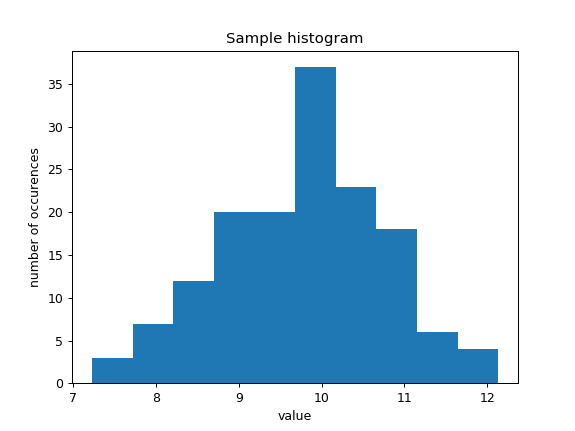

In [5]:
plt.figure()

plt.hist(data)
plt.title("Sample histogram")
plt.xlabel("value")
plt.ylabel("number of occurences");

However, it's often useful to be able to see the outline of the histogram bins, which is turned off by default in Matplotlib. You can do this in one of two ways:

<IPython.core.display.Javascript object>


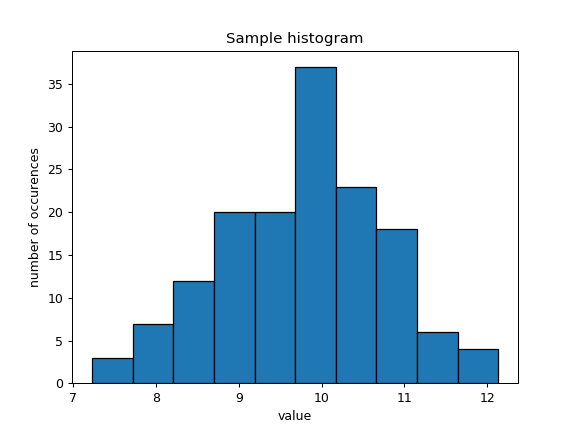

In [6]:
# 1. Include borders explicitly in the plt.hist statement:

plt.figure()
plt.hist(data, edgecolor='black') # you can set the edgecolor to anything, black is probably best
plt.title("Sample histogram")
plt.xlabel("value")
plt.ylabel("number of occurences");

# 2. The following line will globally include borders in all plt.hist (and other bar-type plots) - 
# most useful if you include it in the preamble cell with the import statements 

#plt.rcParams["patch.force_edgecolor"] = True

# Which one you choose to use is up to you!

By default, the matplotlib hist command puts the data into 10 bins. You can see all the possible options in the documentation https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist, but in general the only things you're likely to need to change are:
* The number of bins.
* Whether or not the histogram is normalised - in this case the integral of the histogram will be equal to 1. To use this, set the keyword argument `density=True`.

For example, this will sort the data into 15 bins, and normalize the histogram:

<IPython.core.display.Javascript object>


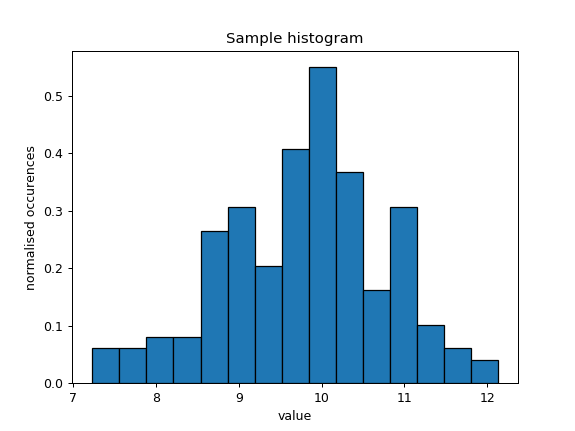

In [7]:
plt.figure()
# 15 bins, normalized:
plt.hist(data,bins=15,density=True,edgecolor='k') # 'k' as abbreviation for black.
plt.title("Sample histogram")
plt.xlabel("value")
plt.ylabel("normalised occurences") ; # semicolon at end suppresses unwanted IPython <output>

### How well does this fit to a Gaussian?

Our data looks as though it may be roughly Gaussian. How can we check this?

We'll use another python module: `scipy.stats`, to find out. (Documentation link: https://docs.scipy.org/doc/scipy/reference/stats.html )

In [8]:
import scipy.stats as stats

Specifically, we'll use `norm.fit` to fit the data that we used in the histogram to a Gaussian, and give us the two parameters $\bar{x}$ and $\sigma$.

In [9]:
x0, sigma = stats.norm.fit(data)
print ("Fitted Gaussian: \n Mean value ", x0, "with standard deviation", sigma)

Fitted Gaussian: 
 Mean value  9.793228122766692 with standard deviation 0.97432217875081


We can see that we obtain the same mean as we got before from `np.mean()`.



<div class="alert alert-success"> 
Now we want to plot the fitted Gaussian on top of the histogram to see how good the fit is.<br> 

In the cell below, write a suitably-named function that will return a Gaussian 
$$y = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[-\frac{(x-\bar{x})^2}{2\sigma^2}\right], $$
for an input $x, \bar{x}$, and $\sigma$.

Don't forget the docstring!
</div>

In [10]:
### STUDENT GENERATED CELL ### 

def func(x, x0, sigma):
    
    'use the equation above:'
    y=(1/(sigma*np.sqrt(2*np.pi)))*(np.exp(-((x-x0)**2)/(2*(sigma**2))))
    
    return y

<div class="alert alert-success"> 
Now complete the cell below to:
<ol>
<li>use np.linspace to create an array of 100 ordered, equally spaced, x-values for the fitted line starting at 7 and finishing at 13</li>
    <li>Use your function to create a corresponding array of y-values with a Gaussian form.</li>
</ol>
</div>

In [11]:
### STUDENT GENERATED CELL ### 

x = np.linspace(7,13,100) #generate x value array

y = func(x, x0, sigma) #define y as the function above


The following cell will replot the (normalised) histogram, a blue line from your generated x and y, and another (red) line.

<IPython.core.display.Javascript object>


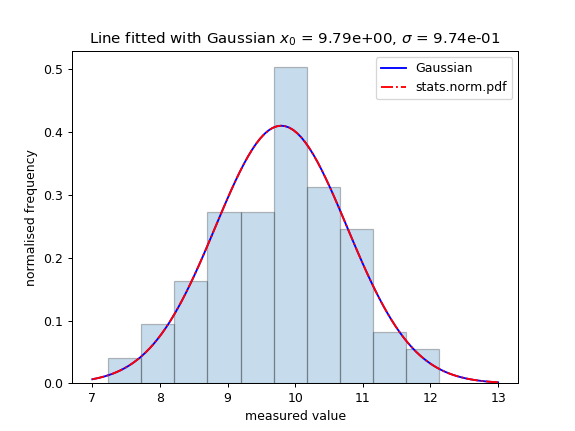

In [12]:
gaussian_check = stats.norm.pdf(x,x0,sigma) # see next text cell for explanation

plt.figure()
plt.hist(data, density=True,alpha=0.25,edgecolor='k')
plt.plot(x,y,'b-', label='Gaussian')
plt.plot(x,gaussian_check,'r-.', label="stats.norm.pdf")
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=(f'Line fitted with Gaussian $x_0$ = {x0:8.2e}, $\sigma$ = {sigma:8.2e}')
# n.b. number format 8.2e : *e*xponential format, *8* chars total, with *2* decimal places
plt.title(title_label) ;

If you've done this correctly, you should find that the red dashed line matches *exactly* with your calculated line (the solid blue line) - as seen in the video for this session. If it doesn't, go back and correct your `gaussian_fn` code until it does! 

Let's look at how the red line was generated - it uses the `stats.norm.pdf` function, which generates the probability density function ("pdf"), i.e. a Gaussian, for the given values of x0 and sigma. It's probably easier to use than generating your own Gaussian, so in future you can use this if you wish.

Note also:
1. the extra option "alpha=0.25" in the hist function - this makes the histogram bars transparent, which makes the graph look a lot more visually clear when you're plotting lines on top of a histogram, or overlaying two histograms.
2. The title of the graph includes the fitted parameters by using a Python f-string. This is often useful to be able to do, so feel free to copy and paste this formatting to other plots if you want.

#### More about python f-strings for formatting

In PHAS0007 last year we mostly used the .format() structure for formatting numbers in code outputs. [Formatted string literals](https://docs.python.org/3/tutorial/inputoutput.html#tut-f-strings) very similar, but are actually a bit easier to use, so we'll be using those in PHAS0029. See the video, and the separate notebook, for more information here.




### More data = a better fit?

We only have 150 data points at the moment. To give you an idea of how data distributions become more Gaussian as the data set size increases, we're going to generate some "fake" data so we can easily change the number of data points. 

The numpy function "[random.normal()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html)" will generate random numbers with a normal distribution for us.

In [13]:
npoints = 10000 # the number of data points we want
mean_x = 10     # roughly the same as the data set above
stdev = 1       # roughly the same as the data set above

# Our fake data set. Don't do this in a lab course!
new_data = np.random.normal(mean_x,stdev,npoints)

<div class="alert alert-success"> 

In the cell below, 
<ol>

<li>Use stats.norm.fit() to find the actual mean and standard deviation of new_data. Are these exactly equal to 10 and 1?</li>
<li>Use stats.norm.pdf() to generate a set of y-values (use the set of x-values you generated with `np.linspace()` in cell 10)</li>
<li>Plot a histogram of the data, with the fitted line on top (just as above).</li>
<li> Experiment with the number of points, `npoints` in the cell above.</li>
<li>Experiment with the number of bins. Do more bins always give better results?</li>
<li>Use further text and code cells to demonstrate your results for two or three different scenarios (i.e. vary the bin ranges and/or the number of data points).</li>
<li>Make sure all your plots are labelled (either on the plot itself or in `print()` outputs) with:
    <ul>
    <li>the number of datapoints;</li>
    <li>the number of bins; </li>
    <li>the values of $x_0$ and $\sigma$,</li>
    </ul>
    for each dataset</li>
</ol>
</div>

9.994566277318444
0.9932308910034533


<IPython.core.display.Javascript object>


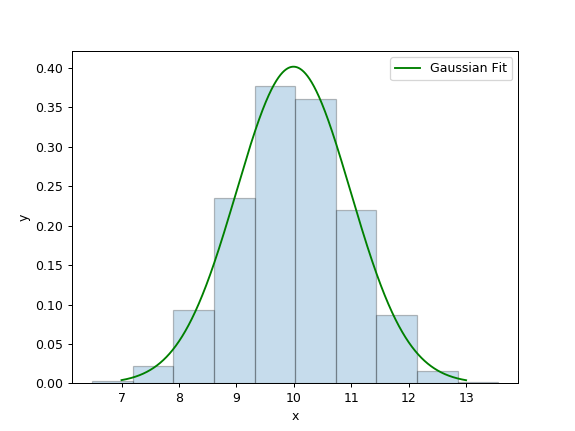

In [14]:
### STUDENT GENERATED CELL ###

mean_x, stdev = stats.norm.fit(new_data) #obtain mean and standard deviation 
print(mean_x)
print(stdev)


x_values = np.linspace(7,13,10000) #array of x values
y_values = stats.norm.pdf(x_values, mean_x, stdev) #y values using stats function

plt.figure()
plt.hist(new_data,  density=True, alpha=0.25, edgecolor='k') 
plt.plot(x_values, y_values, 'g-', label="Gaussian Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

### Students: Add more code and text cells here as needed!

##### Does more data points mean a more Gaussian histogram?
As the number of data points increase, the histogram becomes more Guassian. The bins away from the mean get smaller and smaller. This makes the histogram more Gaussian. For example, choosing 100,000 data points illustrates how the data distributions become more Gaussian:

<IPython.core.display.Javascript object>


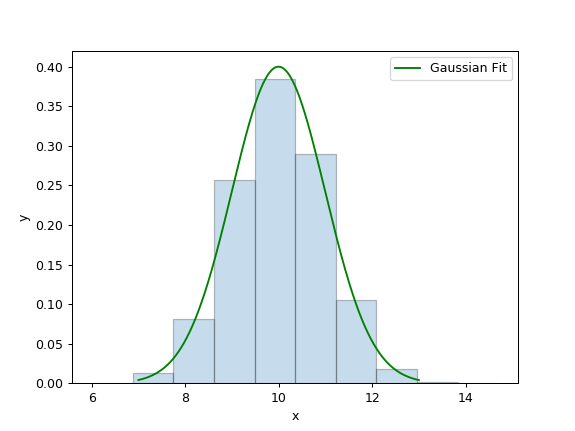

In [15]:
npoints2 = 100000
mean_x2 = 10     
stdev2 = 1       


new_data2 = np.random.normal(mean_x2,stdev2,npoints2)


mean_x2, stdev2 = stats.norm.fit(new_data2) #obtain mean and standard deviation 

x_values2 = np.linspace(7,13,10000) #array of x values
y_values2 = stats.norm.pdf(x_values2, mean_x2, stdev2) #y values using stats function

plt.figure()
plt.hist(new_data2,  density=True, alpha=0.25, edgecolor='k') 
plt.plot(x_values2, y_values2, 'g-', label="Gaussian Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

##### Do more bins give better results?
Below, is a plot of the same graph but with 50 bins compared to 10 above. As you can see, having more bins makes the histogram more inside the Gaussian. Thus, it agrees with the Gaussian more. Therefore, more bins do give better results.

However, including too many bins has the opposit effect. Too many bins leads to the histogram being much outside the Gaussian fit. Thus poorer results. For example, if you change the bins below to 1000 (shown below), you will see the magnitude of the poor results.

<IPython.core.display.Javascript object>


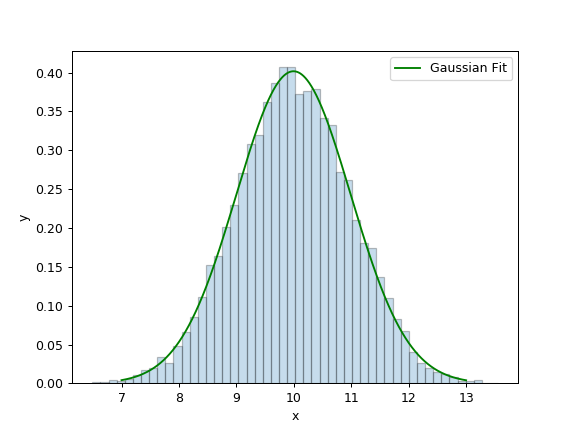

In [18]:
#50 bins
plt.figure()
plt.hist(new_data, bins=50,  density=True, alpha=0.25, edgecolor='k') 
plt.plot(x_values, y_values, 'g-', label="Gaussian Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

<IPython.core.display.Javascript object>


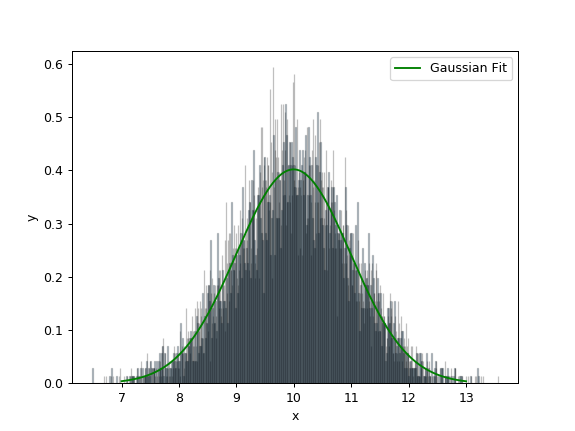

In [17]:
#1000 bins
plt.figure()
plt.hist(new_data, bins=1000,  density=True, alpha=0.25, edgecolor='k') 
plt.plot(x_values, y_values, 'g-', label="Gaussian Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

### When will I need to use this?

Fitting a histogram to a Gaussian is particularly useful when you've fitted some data and want to check how good the fit is. If a fit models the data well, we'd expect the distribution of the *residuals* to be Gaussian.

<div class="alert alert-info"><b>Residual</b>: the (vertical) distance between the data point and the fitted line - we looked at this when we were doing least squares fits in PHAS1240. </div>

This is fairly intuitive. For a good fit, we'd expect roughly as many data points above our fitted line as below, and for most of the data points to be close to the line, with fewer further away.

In sessions 3 and 4, we'll be fitting data to functions, and then using the distribution of the residuals to consider *quantitatively* how well a function fits to our data. 